## Correction for larger values of $k$

It appears that we cannot integrate for values larger $k=\approx 250$ because of the part $${}_2F_1\left(1, 1 + \frac{k}{\beta}; 2 + \frac{k}{\beta}; -e^{z\beta} \right)$$

Indeed, the ${}_2F_1$ function is definded only for $|z| < 1$, but the factor $-e^{z'\beta}$ does not satisfy this condition. For small values of $k$ the fraction in the function stays balanced and returns small values, but for large $k$ the returned numbers get too small and `nan` values are returned.  We therefore need to find a way to extend the function for $|z| > 1$. Following https://arxiv.org/pdf/2010.08555.pdf we use :

$$\sum_{n=0}^{\infty} z^n + \sum_{n=0}^{\infty} z^n \sum_{l=1}^{\infty}(-1)^l \dfrac{n(1+n)^{l-1}}{y^l}$$

valid for $y \rightarrow +\infty$.

In [1]:
import numpy as np
import mpmath as mp

In [2]:
def naive_func(y, z, max_iter=1000):
    res = 0
    for n in range(max_iter):
        val = 0
        for l in range(1, max_iter):
            val += z**n * (-1)**l * (n * (1 + n)**(l - 1))/y**l
        res += z**n + val
    return res

In [3]:
k = np.linspace(0, 1000, 100)
b = 2.5
z = np.linspace(0, 4, 100)

In [4]:
naive_func(k[-1]/b, -np.exp(z[-1] * b))

/var/folders/t9/37s2572n4y1bwsj0j2rb1zrm0000gn/T/ipykernel_54568/3678508697.py:6: RuntimeWarning: overflow encountered in double_scalars
  val += z**n * (-1)**l * (n * (1 + n)**(l - 1))/y**l
/var/folders/t9/37s2572n4y1bwsj0j2rb1zrm0000gn/T/ipykernel_54568/3678508697.py:6: RuntimeWarning: overflow encountered in multiply
  val += z**n * (-1)**l * (n * (1 + n)**(l - 1))/y**l
/var/folders/t9/37s2572n4y1bwsj0j2rb1zrm0000gn/T/ipykernel_54568/3678508697.py:6: RuntimeWarning: invalid value encountered in double_scalars
  val += z**n * (-1)**l * (n * (1 + n)**(l - 1))/y**l


OverflowError: int too large to convert to float

In [5]:
%%timeit
mp_func = np.frompyfunc(mp.hyp2f1, 4, 1)
mp_func(1, 1 + k / b, 2 + k / b, -np.exp(z * b))

def hypsum_2_1_ZZ_Z_R(coeffs, z, prec, wp, epsshift, magnitude_check, **kwargs):
    MAX = kwargs.get('maxterms', wp*100)
    HIGH = MPZ_ONE<<epsshift
    LOW = -HIGH
    SRE = PRE = one = (MPZ_ONE << wp)
    xsign, xm, xe, xbc = z
    if xsign: xm = -xm
    offset = xe + wp
    if offset >= 0:
        ZRE = xm << offset
    else:
        ZRE = xm >> (-offset)
    AINT_0 = coeffs[0]
    AINT_1 = coeffs[1]
    BINT_2 = coeffs[2]
    for n in xrange(1,10**8):
        if n in magnitude_check:
            p_mag = bitcount(abs(PRE))
            magnitude_check[n] = wp-p_mag
        mul = AINT_0 * AINT_1
        div = BINT_2 * n
        if not div:
            if not mul:
                break
            raise ZeroDivisionError
        PRE = ((PRE * mul * ZRE) >> wp) // div
        SRE += PRE
        if HIGH > PRE > LOW:
            break
        if n > MAX:
            raise NoConvergence('Hypergeometric series converges too slowly. Try increasing maxterms.')
        AINT_0 += 1
        AI

In [9]:
from galpy.potential import MN3ExponentialDiskPotential

In [10]:
pot = MN3ExponentialDiskPotential(hr=4, hz=0.8, sech=True)

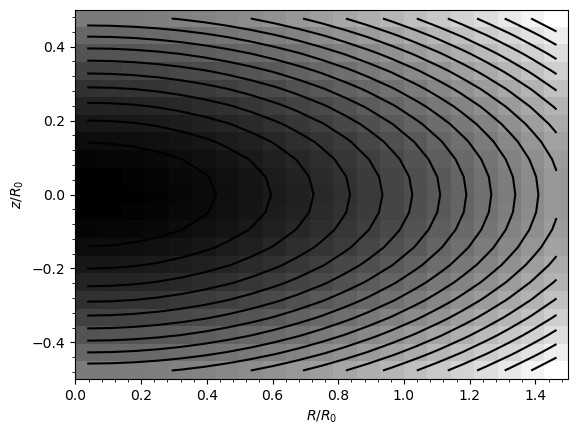

In [12]:
pot.plot();

In [13]:
print(pot)